In [61]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [62]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [63]:
dict1 = unpickle('cifar-10-batches-py/data_batch_1')

In [64]:
def rgb_separation(arr,i):
    col_arr = arr[i] #to get ith image
    len1 = len(col_arr)
    rarr, garr, barr = [], [],[]
    for i in range(int(len1/3)):
        rarr.append(col_arr[i])
    for i in range(int(len1/3), int(2*len1/3)):
        garr.append(col_arr[i])
    for i in range(int(2*len1/3), len1):
        barr.append(col_arr[i])
    return rarr, garr, barr
    

In [65]:
def rgb_unification(rarr1, garr1, barr1):
    image = []
    for i in range(len(rarr1)):
        image.append(rarr1[i])
        image.append(garr1[i])
        image.append(barr1[i])
    image = np.reshape(image,(32,32,3))
    return image

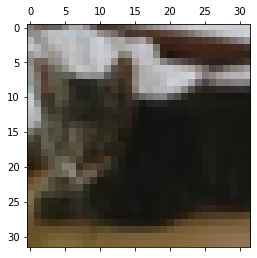

In [66]:
images = dict1[b'data']
rarr0, garr0, barr0 = rgb_separation(images,9)
image0 = rgb_unification(rarr0, garr0, barr0)
plt.matshow(image0)
plt.show()

In [67]:
image_index_list = []
for i in range(10):
    image_index_list.append([])
for i in range(10):
    prev = 0
    for j in range(5):
        for k in range(prev+1, len(dict1[b'labels'])):
            if (dict1[b'labels'][k]==i):
                j+=1
                image_index_list[i].append(k)
                prev = k
                break
print(image_index_list)

[[29, 30, 35, 49, 77], [4, 5, 32, 44, 45], [6, 13, 18, 24, 41], [9, 17, 21, 26, 33], [3, 10, 20, 28, 34], [27, 40, 51, 56, 70], [19, 22, 23, 25, 72], [7, 11, 12, 37, 43], [8, 62, 69, 92, 100], [1, 2, 14, 15, 16]]


In [68]:
for i in range(10):
    for j in range(5):
        images = dict1[b'data']
        rarr0, garr0, barr0 = rgb_separation(images,image_index_list[i][j])
        image0 = rgb_unification(rarr0, garr0, barr0)
        #plt.matshow(image0)
        #plt.show()

In [69]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [70]:
x = np.array(dict1[b'data'])
y = np.array(dict1[b'labels'])
clf = LinearDiscriminantAnalysis()
clf.fit(x,y)
print(clf.predict([dict1[b'data'][2], dict1[b'data'][4]]))

[9 8]
